Basically there are four way of finding outlier
1. z-score
2. IQR(Inter quantile range)
3. scatter plot
4. box plot

z-score:-
    It is based on standard normal distribution.
    mathematical formula:-
        z=(x-mean)/sigma

IQR:-
    It is based on percentile.
    mathematical formula:-
        q1 = dataset.quantile(.25)
        q3 = dataset.quantile(.75)
        IQR = q3-q1
        lower_bound_value = q1-(1.5*IQR)
        upper_bound_value = q3+(1.5*IQR)
        
scatter plot:-
    A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display 
    values for typically two variables for a set of data. 
    
box plot:-
    box plot technique use the same mathematical formula of IQR technique, only difference box plot use figure 
    to show outlier but IQR not.
    
    
NOTE:
    There are many more technique of finding outlier. This three technique are most used and easy technique.
        

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats


In [95]:
data = pd.read_csv('/home/hasan/Downloads/gender-height-weight-index.csv')

In [96]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [97]:
data.shape

(500, 4)

In [98]:
gender_dummies = pd.get_dummies(data['Gender'])
gender_dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [99]:
data = pd.concat([data,gender_dummies], axis=1)
data.drop('Gender', axis=1, inplace=True)
data.head()

,Height,Weight,Index,Female,Male
0,174,96,4,0,1
1,189,87,2,0,1
2,185,110,4,1,0
3,195,104,3,1,0
4,149,61,3,0,1


# finding outlier using zscore

In [100]:
z = np.abs(stats.zscore(data))
z

array([[0.24793878, 0.30911702, 0.18615685, 1.02020406, 1.02020406],
       [1.16487212, 0.58732233, 1.29127847, 1.02020406, 1.02020406],
       [0.92035656, 0.12364681, 0.18615685, 0.98019606, 0.98019606],
       ...,
       [1.76931458, 0.92735105, 0.92487451, 0.98019606, 0.98019606],
       [1.21915457, 0.34002872, 0.92487451, 1.02020406, 1.02020406],
       [0.18680989, 0.77279254, 0.92487451, 1.02020406, 1.02020406]])

In [101]:
threshold=2.5
outlier_row_column = np.where(z>threshold)
outlier_row_column

(array([ 60,  62,  79,  85,  99, 150, 214, 224, 244, 273, 354, 453, 492]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

Those are outliers rows and columns                                                                                 
here I have took threshold=2.5 but taking threshold=3 is standard

In [102]:
#printing one threshold value
print(z[60][2])

2.768713794904124


In [103]:
zdata = data[(z<2.5).all(axis=1)]
zdata.head()

,Height,Weight,Index,Female,Male
0,174,96,4,0,1
1,189,87,2,0,1
2,185,110,4,1,0
3,195,104,3,1,0
4,149,61,3,0,1


In [104]:
zdata.shape

(487, 5)

some rows decreased

# Finding Outlier Using IQR

In [105]:
data.head()

,Height,Weight,Index,Female,Male
0,174,96,4,0,1
1,189,87,2,0,1
2,185,110,4,1,0
3,195,104,3,1,0
4,149,61,3,0,1


In [106]:
data.shape

(500, 5)

In [107]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

In [108]:
IQR

Height    28.0
Weight    56.0
Index      2.0
Female     1.0
Male       1.0
dtype: float64

IQR value of every column of the dataset

In [109]:
lower_bound_value = Q1-(1.5*IQR)
upper_bound_value = Q3+(1.5*IQR)

boston_df_o1 < (Q1 - 1.5 * IQR)

In [110]:
print((data<lower_bound_value) | (data>upper_bound_value))

     Height  Weight  Index  Female   Male
0     False   False  False   False  False
1     False   False  False   False  False
2     False   False  False   False  False
3     False   False  False   False  False
4     False   False  False   False  False
..      ...     ...    ...     ...    ...
495   False   False  False   False  False
496   False   False  False   False  False
497   False   False  False   False  False
498   False   False  False   False  False
499   False   False  False   False  False

[500 rows x 5 columns]


True means outlier and False means not outlier

In [111]:
#data without outlier
data[~((data<lower_bound_value) | (data>upper_bound_value)).any(axis=1)]

,Height,Weight,Index,Female,Male
0,174,96,4,0,1
1,189,87,2,0,1
2,185,110,4,1,0
3,195,104,3,1,0
4,149,61,3,0,1
...,...,...,...,...,...
495,150,153,5,1,0
496,184,121,4,1,0
497,141,136,5,1,0
498,150,95,5,0,1


no outlier using IQR

# Finding Outlier using box plot

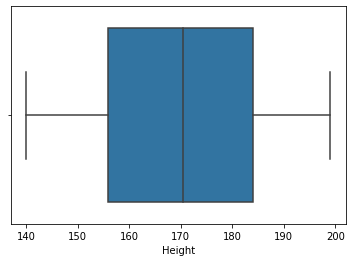

In [116]:
#outlier of Height column
sns.boxplot(data['Height'])

# Outlier using scatter plot

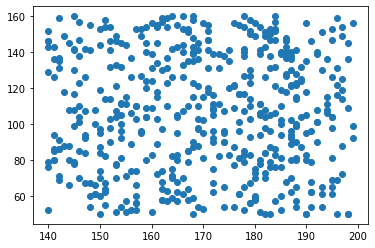

In [118]:
plt.scatter(x=data['Height'], y=data['Weight'])